# KMeans

***

O KMeans pertencem à classe de modelos não supervisionados. Modelos não supervisionados não requerem a utilização de classes, ou um alvo específico para aprender padrões. A partir das próprias features no dataset, os padrões são aprendidos.


In [41]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes do modelo
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## Métodos para visualização

In [42]:
def show_decision_region(x, y, clf, f0, f1, centroids=None):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    plt.title(clf.__class__.__name__)

    if centroids is not None:
        plt.scatter(
            centroids[:, 0],
            centroids[:, 1], 
            c="tab:red", 
            marker="*",
            s=300,
            alpha=1
        )
    plt.show()

## Conjunto de dados

In [43]:
#carregando o csv
dataset = pd.read_csv("https://raw.githubusercontent.com/Francimaria/monitoria-ml/main/Iris.csv")

In [44]:
# Vamos utilizar apenas duas features para facilitar a visualização
feature_0 = "PetalLengthCm"
feature_1 = "PetalWidthCm"

X = dataset.iloc[:,[2,3]]

# Não vamos considerar y, porque o k-means é não supervisionado
# y = dataset.iloc[:,[4]]

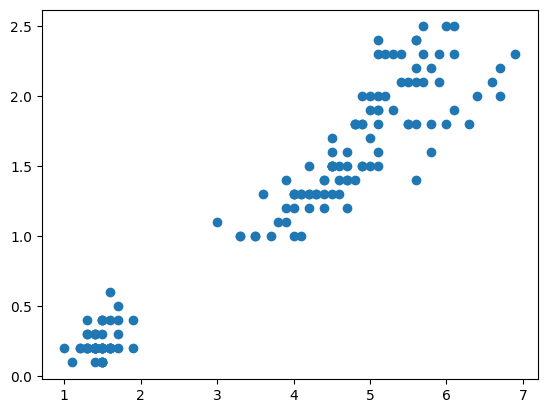

In [45]:
plt.scatter(
    X[feature_0],
    X[feature_1], 
)

## k-means 

O k-Means requer que você informe a quantidade de centróides em que os dados devem ser agrupados. Cada centróides representa o ponto de referência para um cluster. 

Alguns pontos que devem ser observados:

1 - Inicialmente, um centróides pode ser escolhido como uma instância aleatória do dataset, que será atualizado até a variação do ponto durante sua atualização se tornar baixa o suficiente.

     A implementação do _sklearn_ do KMeans possui várias otimizações sobre o algoritmo original. Primeiramente, a escolha inicial dos centróides não é feita de forma puramente aleatória, utiliza o algoritmo k-means++: ao invés de escolher de forma aleatória os centróides inciais, o algoritmo realiza k iterações, onde a probabilidade de escolher um ponto respeita uma função de distribuição não-linear. A cada vez que uma instãncia é escolhida, a probabilidade de escolher uma nova instância próxima às anteriores é menor.

2 - Após os clusters atingirem convergência, o algoritmo termina sua execução.

    Na implementação do _sklearn_ do KMeans o algoritmo é executado várias vezes (10 por padrão), e o resultado com melhor clusterização é utilizado.

In [34]:
model = KMeans(n_clusters=3, random_state=199)

# No fit pode ser passado o y, mas ele não é usado, presente apenas para consistência da API por convenção.
model.fit(X)
cluster_pred = model.predict(X)

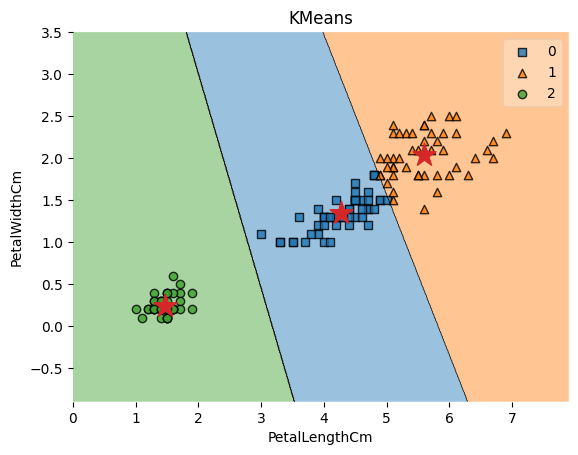

In [35]:
show_decision_region(
    np.array(
        [
            X[feature_0].values, 
            X[feature_1].values,
        ]
    ).T, 
    cluster_pred, 
    model, 
    feature_0, 
    feature_1,
    model.cluster_centers_
)

**Note que a custerização cria uma região linear!**



## Limitações

No exemplo anterior, observamos que a região criada pelo KMeans é linear. Isso é referente ao KMeans ou ao dataset? Vamos avaliar outro dataset.

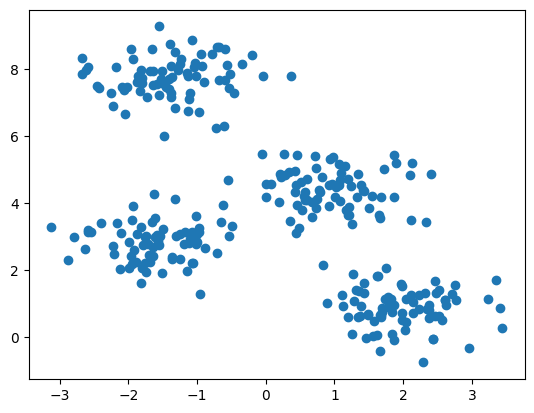

In [36]:
from sklearn.datasets import make_blobs, make_circles

# criação do dataset
X_b, _ = make_blobs(300, 2, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X_b[:, 0], X_b[:, 1])

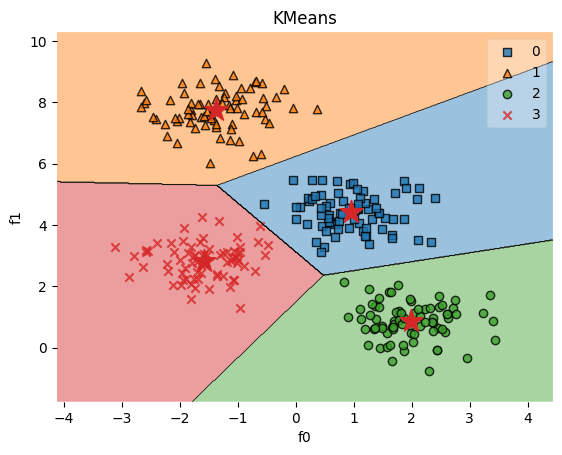

In [37]:
model = KMeans(n_clusters=4)
model.fit(X_b)
cluster_pred_b = model.predict(X_b)

show_decision_region(
    X_b,
    cluster_pred_b,
    model,
    "f0",
    "f1",
    model.cluster_centers_
)

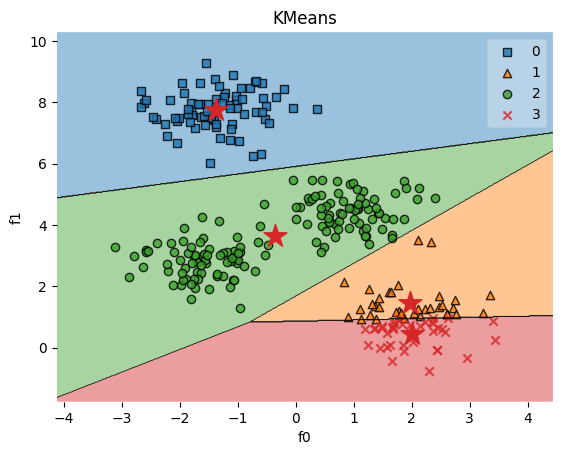

In [38]:
# E se removermos a otimização do k-means 

model = KMeans(n_clusters=4, init="random", n_init=1, random_state=0)
model.fit(X_b)
cluster_pred_b = model.predict(X_b)

show_decision_region(
    X_b,
    cluster_pred_b,
    model,
    "f0",
    "f1",
    model.cluster_centers_
)

**Vamos observar outro exemplo**

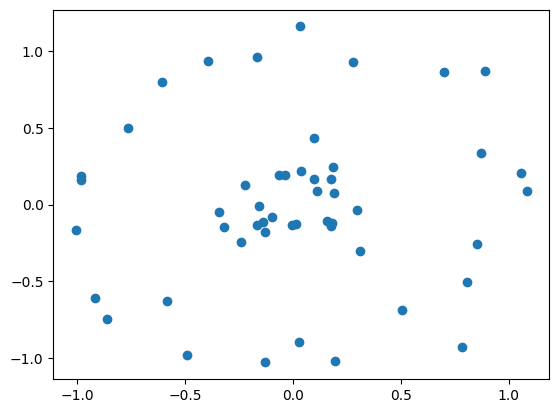

In [39]:
X_c, _ = make_circles(n_samples=50, noise=0.1, random_state=199, factor=0.2)
plt.scatter(X_c[:, 0], X_c[:, 1])

Esse dataset possui uma não-linearidade, será que o KMeans consegue resolver essa região?

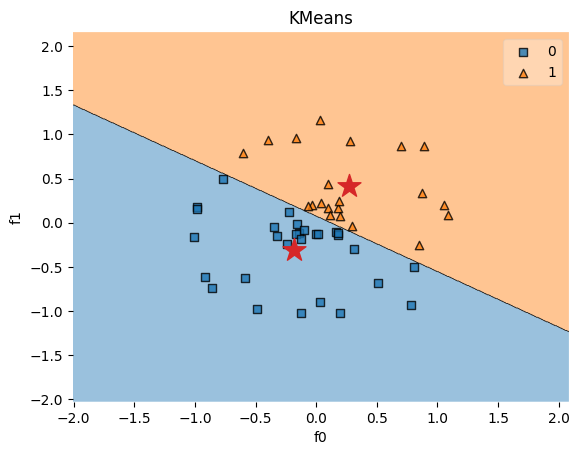

In [40]:
model = KMeans(n_clusters=2)
model.fit(X_c)
cluster_pred_c = model.predict(X_c)

show_decision_region(
    X_c,
    cluster_pred_c,
    model,
    "f0",
    "f1",
    model.cluster_centers_
)

Aqui observamos que KMeans não consegue capturar grupamentos não lineares de forma eficiente. Observe que para atribuir uma instância a um cluster, o KMeans utiliza distância euclidiana, portanto, criando regiões de separação lineares.


Para mais informações:

[_user guide_](https://scikit-learn.org/stable/modules/clustering.html) do _sklearn_.